# Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wrangle as w
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [3]:
df = w.prep_zillow(df)

In [4]:
train, validate, test = w.splitting_data(df)

In [5]:
train.shape

(1284141, 7)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 760406 to 243585
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1284141 non-null  int64  
 1   bathrooms    1284141 non-null  float64
 2   area         1284141 non-null  int64  
 3   salesamount  1284141 non-null  int64  
 4   yearbuilt    1284141 non-null  int64  
 5   taxamount    1284141 non-null  float64
 6   county       1284141 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 78.4+ MB


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [7]:
train_scaled = train.copy()

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'salesamount', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [9]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms','taxamount', 'area']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [10]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'salesamount', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [11]:
train_scaled.head(2)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
760406,0.166667,0.05,0.001124,155970,1905,0.001954,LA
1702166,0.111111,0.05,0.000844,401070,1940,0.004541,LA


Text(0, 0.5, 'Count')

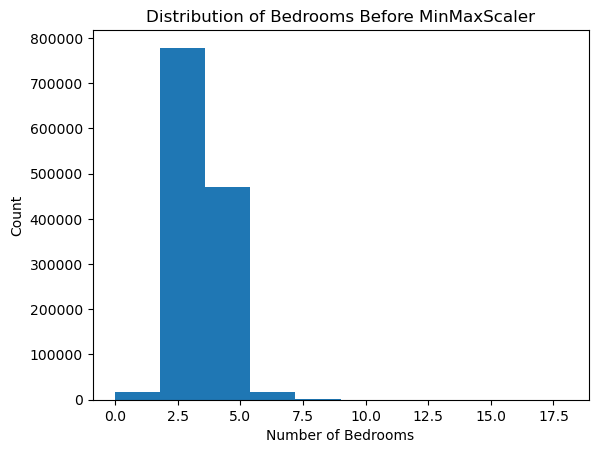

In [12]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

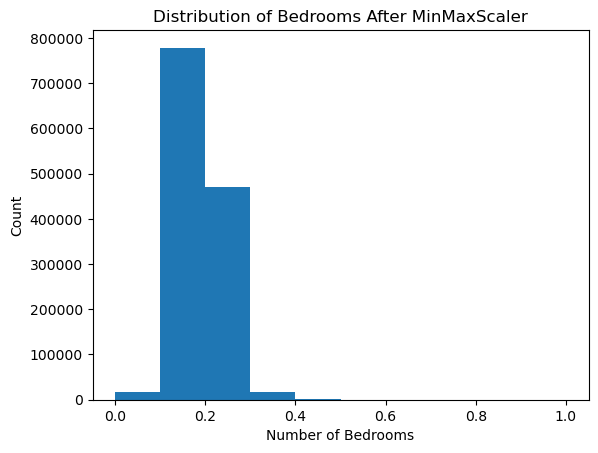

In [13]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [14]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

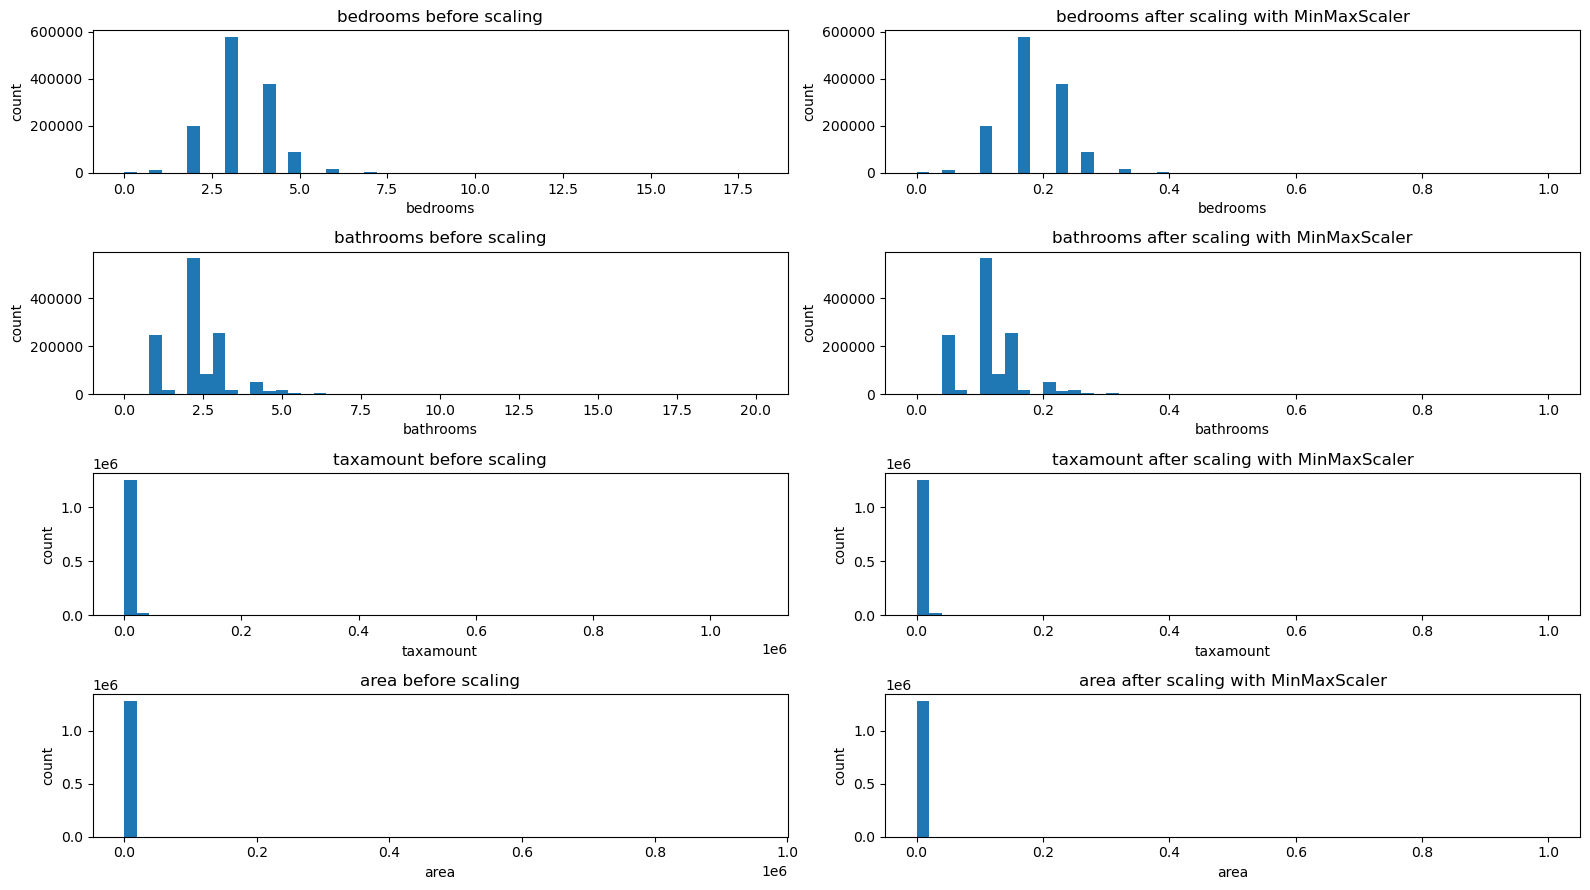

In [15]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

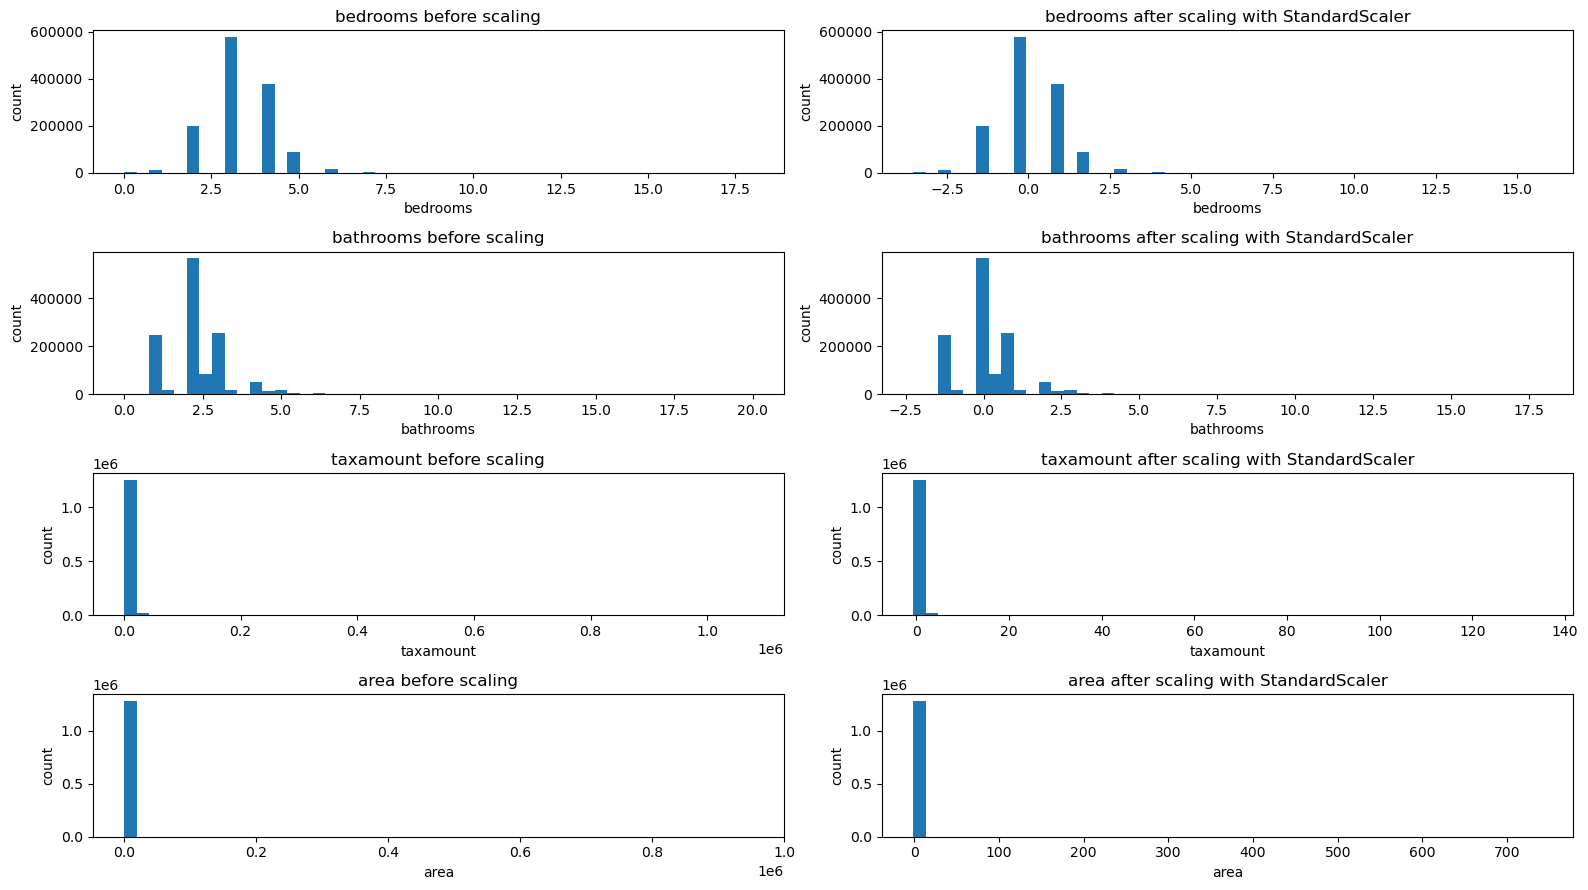

In [16]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

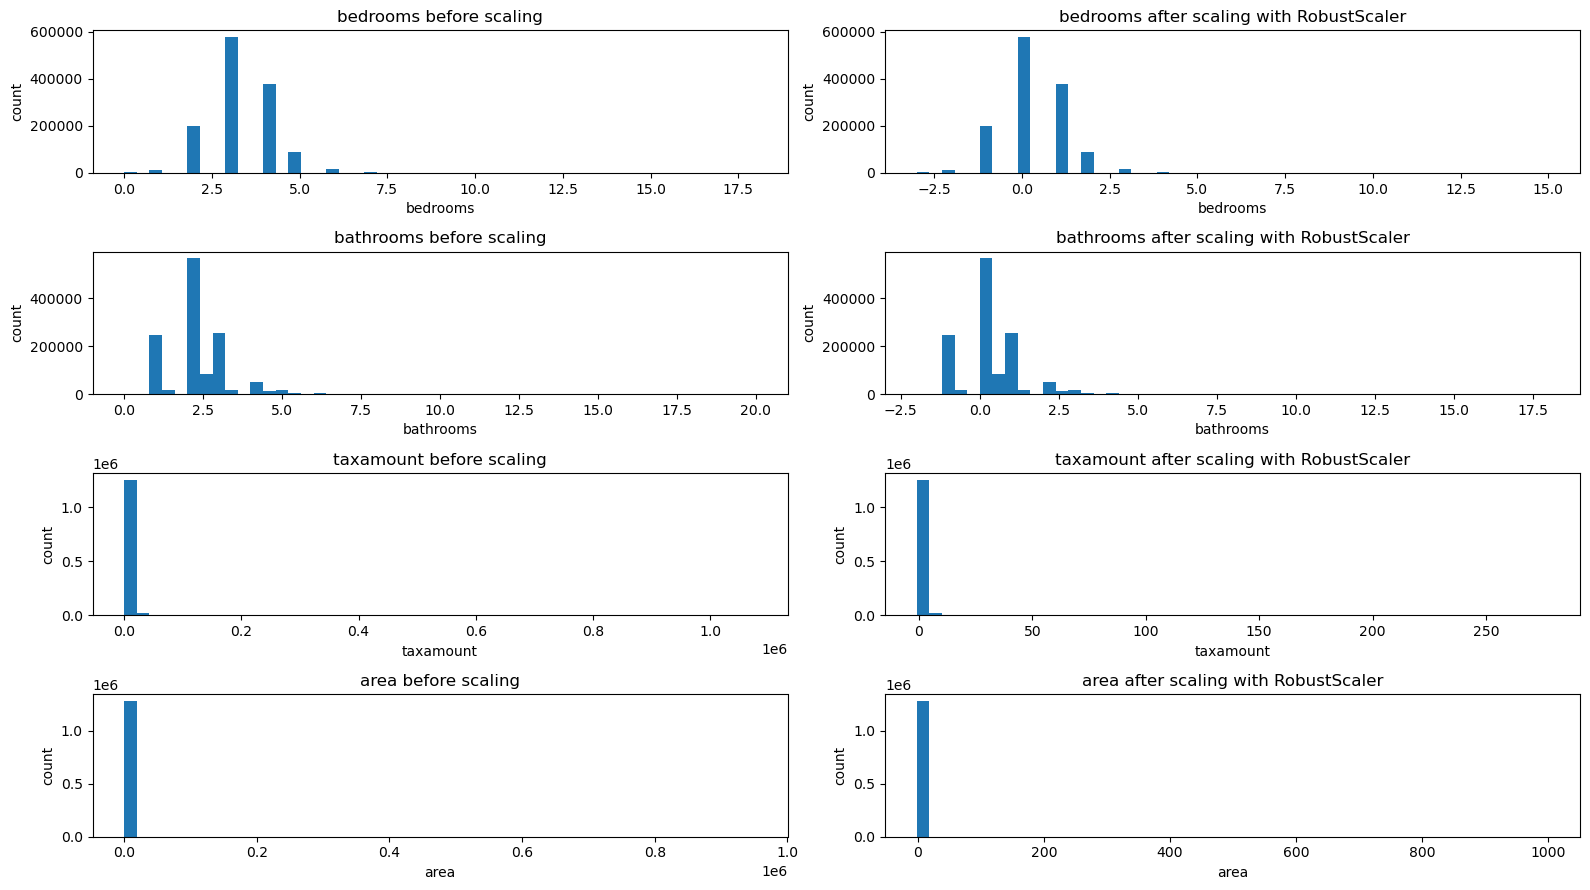

In [17]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [19]:
scaled_data[:5]

array([[0.00195434],
       [0.00454149],
       [0.00680725],
       [0.00305891],
       [0.00379896]])

In [20]:
original_data[:5]

,taxamount
760406,2113.31
1702166,4902.50
2124078,7345.21
627151,3304.14
718907,4101.98


In [21]:
scaler.inverse_transform(scaled_data)[:5]

array([[2113.31],
       [4902.5 ],
       [7345.21],
       [3304.14],
       [4101.98]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

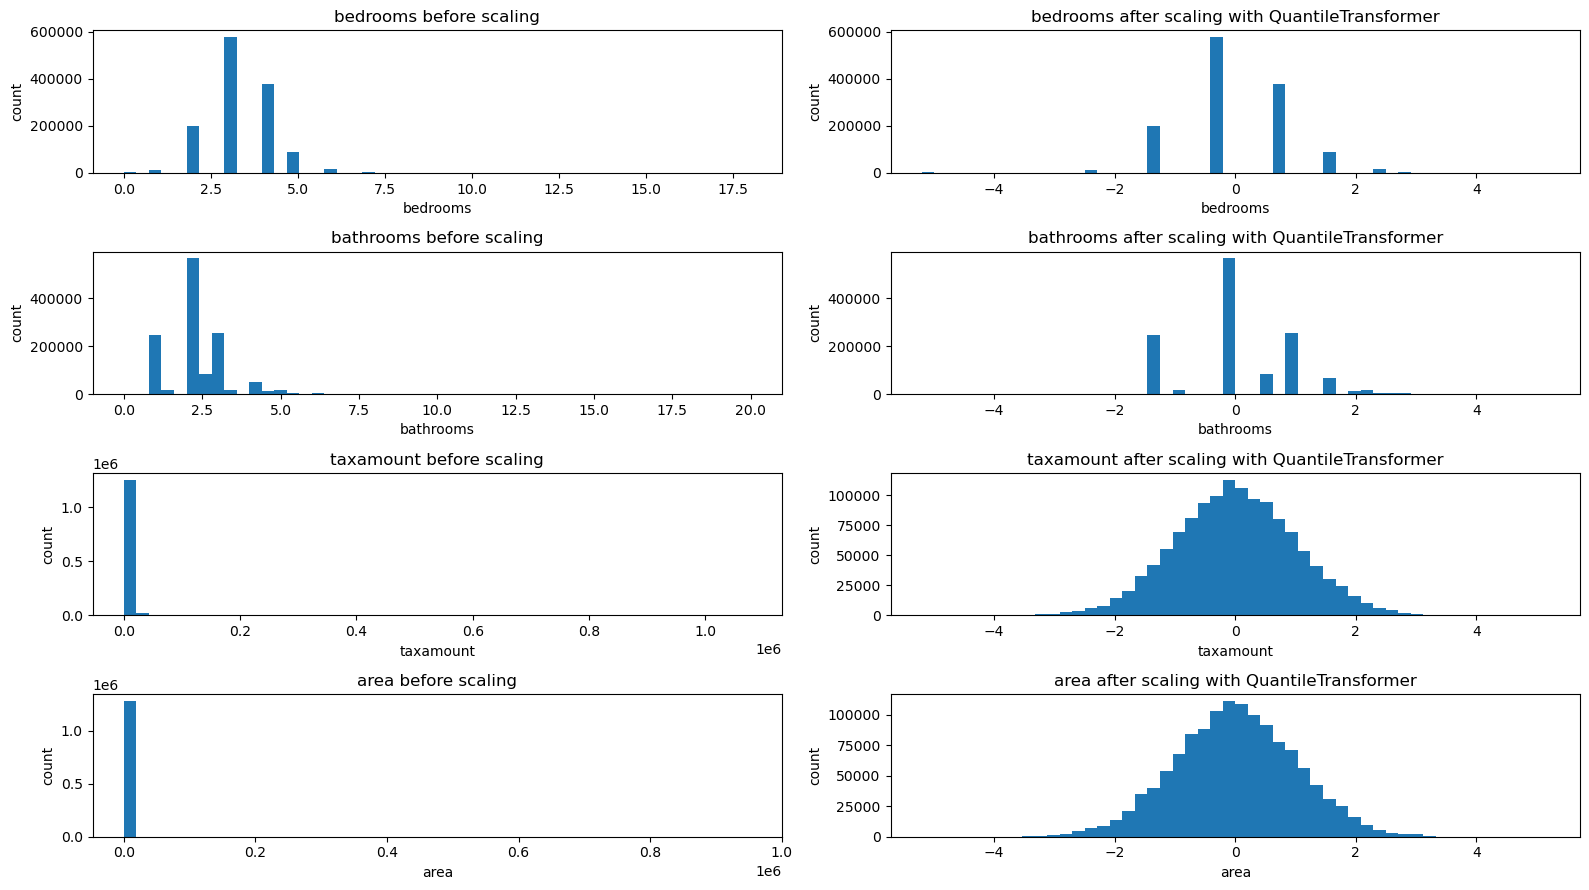

In [22]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

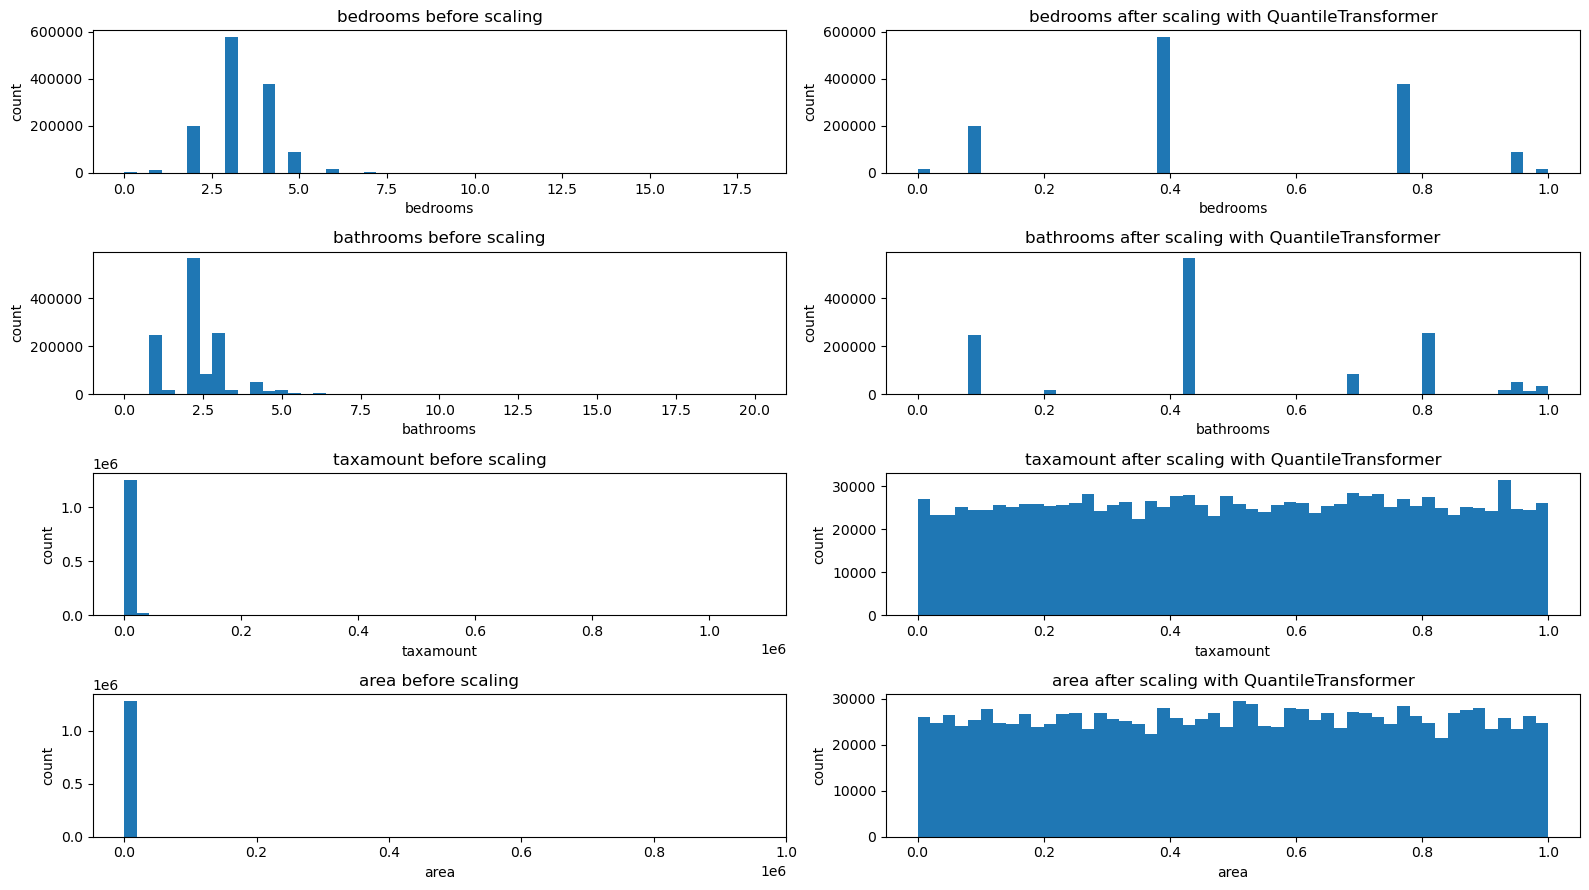

In [23]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 

### Creating a Pipeline Function

In [26]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'taxamount', 'area'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [27]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [28]:
scaler

MinMaxScaler()

In [ ]:
train_scaled

In [ ]:
validate_scaled

In [ ]:
test_scaled